In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"e1d46c7b67e8fc3f238bdb1a6a64a530"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 89% 83.0M/93.0M [00:01<00:00, 79.0MB/s]
100% 93.0M/93.0M [00:01<00:00, 86.9MB/s]


In [ ]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


# **DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/immo_data.csv')

In [ ]:
for i in train.columns.to_list():
  nulls = train[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of regio1
0
null datas of serviceCharge
6909
null datas of heatingType
44856
null datas of telekomTvOffer
32619
null datas of telekomHybridUploadSpeed
223830
null datas of newlyConst
0
null datas of balcony
0
null datas of picturecount
0
null datas of pricetrend
1832
null datas of telekomUploadSpeed
33358
null datas of totalRent
40517
null datas of yearConstructed
57045
null datas of scoutId
0
null datas of noParkSpaces
175798
null datas of firingTypes
56964
null datas of hasKitchen
0
null datas of geo_bln
0
null datas of cellar
0
null datas of yearConstructedRange
57045
null datas of baseRent
0
null datas of houseNumber
71018
null datas of livingSpace
0
null datas of geo_krs
0
null datas of condition
68489
null datas of interiorQual
112665
null datas of petsAllowed
114573
null datas of street
0
null datas of streetPlain
71013
null datas of lift
0
null datas of baseRentRange
0
null datas of typeOfFlat
36614
null datas of geo_plz
0
null datas of noRooms
0
null datas of therma

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
drop_columns=[]
nulls=train.isnull().sum()
for i,j in enumerate(nulls):
  if(j>150000):
    drop_columns.append(i)
len(drop_columns)

7

In [ ]:
drop_columns_name=[]
for i in drop_columns:
  drop_columns_name.append(train.columns[i])
train.drop(columns=drop_columns_name, inplace=True)
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,115641081,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,66924271,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,110938302,gas,False,Nordrhein_Westfalen,True,9.0,840.0,58,70.00,Köln,first_time_use,sophisticated,no,Idastra&szlig;e,Idastraße,True,6,apartment,51069,2.0,2

In [ ]:
train = train.drop(columns=['scoutId','houseNumber' , 'street','streetPlain','description', 'facilities','date','livingSpaceRange'])
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,gas,False,Bremen,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,geothermal,False,Bayern,True,9.0,820.0,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,gas,True,Hessen,False,4.0,930.0,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,gas,False,Hessen,True,2.0,650.0,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,gas,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,Köln,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,NaN,5.0,2,False,Köln,Dellbrück


In [ ]:
#delete_index = train[train['serviceCharge'].isna()].index
#train.drop(index = delete_index, inplace=True)

In [ ]:
#train.drop(labels=['telekomHybridUploadSpeed' , 'R_emaildomain'], axis=1, inplace=True)

In [ ]:
#train.heatingType.fillna(train.heatingType.mode()[0] , inplace=True)

In [ ]:
#label : telekomTvOffer
#heatingType


In [ ]:
#plt.figure(figsize=(20,8))

#sns.countplot(train['heatingType'])

In [ ]:
for cols in train.columns:
    if train[cols].dtype == 'object' or train[cols].dtype == 'bool':
        print('column : {} , unique values : {}'.format(cols,train[cols].nunique()))

column : regio1 , unique values : 16
column : heatingType , unique values : 13
column : telekomTvOffer , unique values : 3
column : newlyConst , unique values : 2
column : balcony , unique values : 2
column : firingTypes , unique values : 132
column : hasKitchen , unique values : 2
column : geo_bln , unique values : 16
column : cellar , unique values : 2
column : geo_krs , unique values : 419
column : condition , unique values : 10
column : interiorQual , unique values : 4
column : petsAllowed , unique values : 3
column : lift , unique values : 2
column : typeOfFlat , unique values : 10
column : garden , unique values : 2
column : regio2 , unique values : 419
column : regio3 , unique values : 8684


In [ ]:
train = train.drop(columns = ['firingTypes','geo_krs','regio2','regio3'])
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,False,Rheinland_Pfalz,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,False,Sachsen,True,9.0,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,False,Sachsen,False,2.0,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,86.00,3.0,NaN,3,False
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,False,Bremen,False,1.0,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,False,Bayern,True,9.0,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,True,Hessen,False,4.0,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,False,Hessen,True,2.0,650.0,95.00,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,NaN,5.0,2,False


In [ ]:
#train.serviceCharge.fillna(train.serviceCharge.mode()[0] , inplace=True)
#train.pricetrend.fillna(train.pricetrend.mode()[0] , inplace=True)
#train.telekomUploadSpeed.fillna(train.telekomUploadSpeed.mode()[0] , inplace=True)
#train.totalRent.fillna(train.totalRent.mode()[0] , inplace=True)
#train.yearConstructedRange.fillna(train.yearConstructedRange.mode()[0] , inplace=True)
#train.yearConstructed.fillna(train.yearConstructed.mode()[0] , inplace=True)
#train.thermalChar.fillna(train.thermalChar.mode()[0] , inplace=True)
#train.floor.fillna(train.floor.mode()[0] , inplace=True)
#train.numberOfFloors.fillna(train.numberOfFloors.mode()[0] , inplace=True)
#train.info()

In [ ]:
train._get_numeric_data().dtypes
train.fillna(train._get_numeric_data().mean(),inplace = True)

In [ ]:
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,False,Rheinland_Pfalz,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,False,Sachsen,True,9.0,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,False,Sachsen,False,2.0,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,False,Bremen,False,1.0,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,2016.0,False,Bayern,True,9.0,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,28.804928,1150.000000,1983.0,True,Hessen,False,4.0,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,1965.0,False,Hessen,True,2.0,650.0,95.00,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,28.804928,1015.000000,2019.0,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.700000,2.122405,5.000000,2,False


In [ ]:
for co in train.columns:
    if train[co].dtype == 'int64' or train[co].dtype == 'float64':
        upper_lim = train[co].mean() + 3 * train[co].std()
        lower_lim = train[co].mean() - 3 * train[co].std()
        
        indices = train[(train[co] > upper_lim) | (train[co] < lower_lim)].index
        train = train.drop(indices)

In [ ]:
train.shape

(258567, 30)

In [ ]:
for cols in train.columns:
    if train[cols].dtype == 'int64' or train[cols].dtype == 'float64':
        if cols != 'livingSpace':
            #train[cols] = ((train[cols] - min(train[cols]))/(max(train[cols]) - min(train[cols])))
            train[cols] = ((train[cols] - train[cols].mean())/(train[cols].std()))

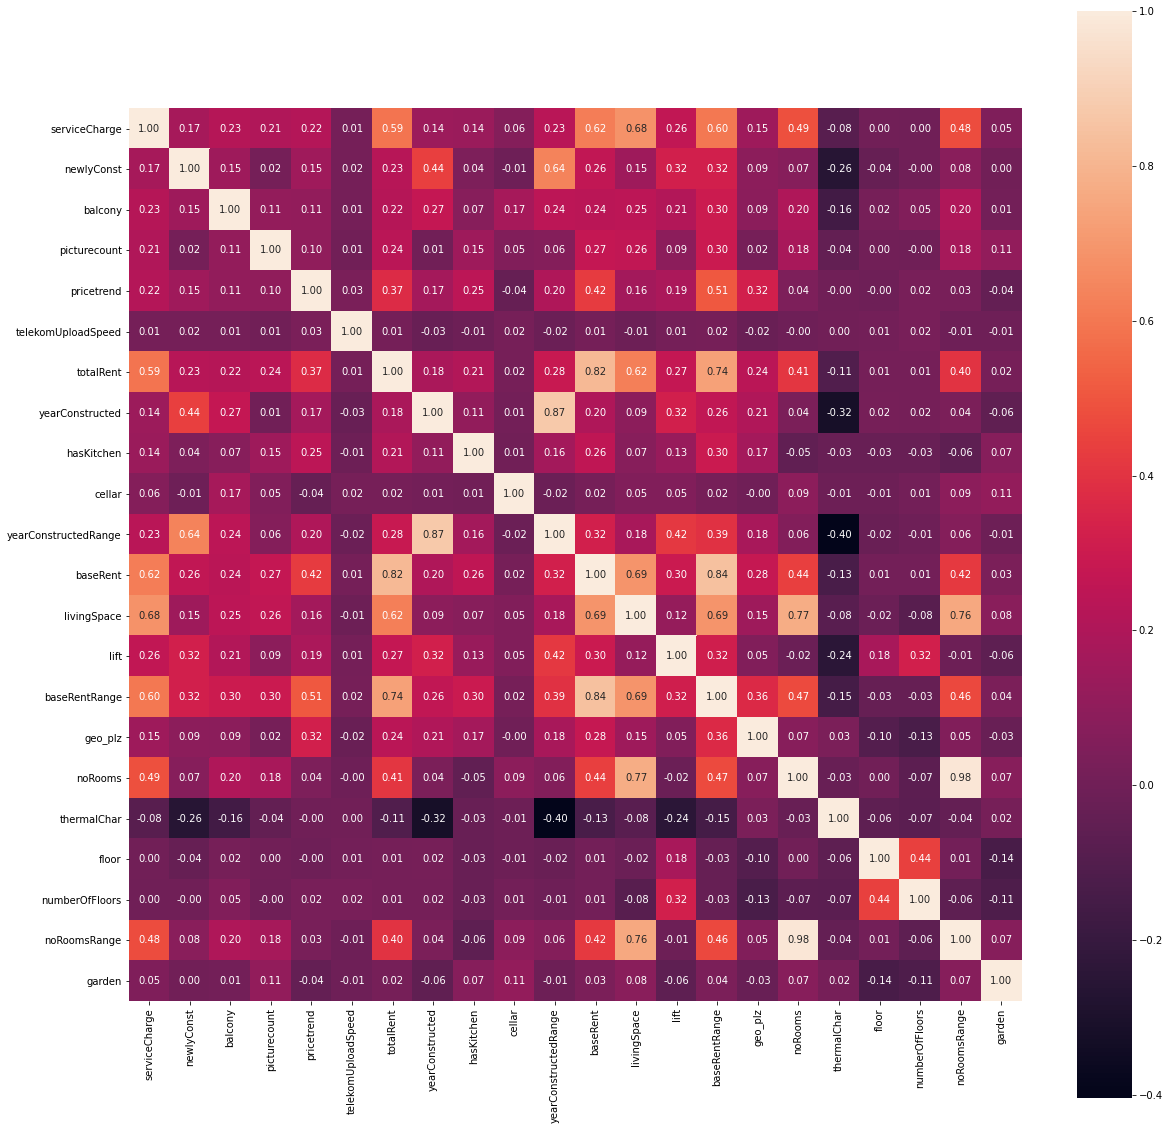

In [ ]:
correlation = train.corr()
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlation, square = True,fmt='.2f' ,annot = True)

In [ ]:
categorical_columns = []
for cols in train.columns:
    if train[cols].dtype == 'object' or train[cols].dtype == 'bool':
        categorical_columns.append(cols)
        
categorical_columns

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden']

In [ ]:
temp = pd.get_dummies(train[categorical_columns])

In [ ]:
train = pd.concat([train, temp], axis=1)
train = train.drop(columns = categorical_columns)
train

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,...,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,1.182833,-0.616990,0.698092,-1.234524,0.045552,-0.088239,-0.716351,-0.083496,86.00,0.127524,0.249131,1.422715,1.915460,-0.787600,-0.369128,1.539791,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-0.181795,-0.259074,0.079636,-1.234524,0.161787,-2.875390,-1.129501,0.334331,89.00,0.583179,1.082916,0.391944,0.062764,0.036426,0.049522,0.466695,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1.305773,-0.259074,-0.323704,-1.734112,0.917339,1.512890,2.175701,0.670631,83.80,1.038835,-1.303099,0.391944,0.062764,0.680723,0.362370,0.466695,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-1.114291,-0.080116,-0.963671,0.737533,0.161787,-0.117890,-0.716351,-0.597118,58.15,-0.783787,-0.997413,0.391944,-0.736393,0.680723,0.049522,0.466695,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.132619,1.709464,-0.463529,0.001622,0.164949,-0.532998,-1.129501,0.262995,84.97,0.583179,-0.328155,0.391944,2.123939,-0.787600,0.049522,0.466695,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,-0.722729,-1.690738,-0.312949,-1.234524,0.178215,1.423938,2.175701,0.375095,90.00,1.038835,1.619754,0.391944,0.062764,0.036426,0.049522,0.466695,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
268846,0.875485,0.456758,1.703754,0.001622,0.633061,0.445470,0.109949,0.599295,115.00,1.038835,1.121028,0.907329,0.062764,-0.787600,-1.832123,0.466695,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
268847,0.875485,2.067380,-0.226903,0.737533,0.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258567 entries, 0 to 268849
Data columns (total 91 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   serviceCharge                                 258567 non-null  float64
 1   picturecount                                  258567 non-null  float64
 2   pricetrend                                    258567 non-null  float64
 3   telekomUploadSpeed                            258567 non-null  float64
 4   totalRent                                     258567 non-null  float64
 5   yearConstructed                               258567 non-null  float64
 6   yearConstructedRange                          258567 non-null  float64
 7   baseRent                                      258567 non-null  float64
 8   livingSpace                                   258567 non-null  float64
 9   baseRentRange                                 25

In [ ]:
nulls = train.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [ ]:
y = train['livingSpace'].values
train = train.drop('livingSpace', axis=1, inplace=False)
x = train.values

# **Resgression**

In [ ]:
from sklearn.model_selection import train_test_split
trainx, testx , trainy , testy = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
np.random.seed(42)
bias = np.random.randn(1)
w = np.random.randn(90)
n = trainx.shape[0]

lr = 0.01
epochs = 500


for epoch in range(epochs+1):

    error = 1/2 * (trainy - np.sum((w * trainx) + bias , axis = 1))
    
    if epoch % 10 == 0:
        print('epoch {} , MeanSquaredError : {}'.format(epoch,(error**2).mean()))

    gradian_w = np.zeros(90)
    gradian_b = 0
    
    for i in range(90):
        gradian_w[i] = -1 * (trainx[:,i] * error).mean()
        w[i] = w[i] - (lr * gradian_w[i])
        
    gradian_b = -1 * error.mean()
    bias = bias - (lr * gradian_b)

epoch 0 , MeanSquaredError : 455.0655711793419
epoch 10 , MeanSquaredError : 189.94145214391472
epoch 20 , MeanSquaredError : 147.98065609463154
epoch 30 , MeanSquaredError : 120.05276586699976
epoch 40 , MeanSquaredError : 101.18410528909669
epoch 50 , MeanSquaredError : 88.21829560569797
epoch 60 , MeanSquaredError : 79.14146747319585
epoch 70 , MeanSquaredError : 72.66037249862295
epoch 80 , MeanSquaredError : 67.9378811162024
epoch 90 , MeanSquaredError : 64.42684997796557
epoch 100 , MeanSquaredError : 61.76552966735544
epoch 110 , MeanSquaredError : 59.711518763893686
epoch 120 , MeanSquaredError : 58.09989937420842
epoch 130 , MeanSquaredError : 56.81657291252717
epoch 140 , MeanSquaredError : 55.781175122733785
epoch 150 , MeanSquaredError : 54.936047697917665
epoch 160 , MeanSquaredError : 54.239055112953245
epoch 170 , MeanSquaredError : 53.65885540336769
epoch 180 , MeanSquaredError : 53.171747139887884
epoch 190 , MeanSquaredError : 52.7595368541422
epoch 200 , MeanSquaredE

In [ ]:
pred = np.sum((w * testx) + bias , axis = 1)
prediction = pd.DataFrame({'test':testy,'pred':pred})
prediction.head()

,test,pred
0,50.00,45.204292
1,54.29,48.619142
2,118.00,98.772238
3,58.00,70.368394
4,68.00,64.506984


In [ ]:
true = 0
false = 0

for i in range(testy.shape[0]):
    if pred[i] > testy[i] - 0.2 * testy[i]  and pred[i] < testy[i] + 0.2 * testy[i] :
      true = true+1 
    else:
      false = false+1

accuracy = (true / testy.shape[0]) * 100
print("Accuacy:" , accuracy)

Accuacy: 77.04876822523882


In [ ]:
print("MSE = ")
print((((testy - pred) ** 2) . mean()))

MSE = 
202.1462227272524


For One Feature (No Rooms)

In [ ]:
x1 = train['noRooms'].values
train_x, test_x = train_test_split(x1 , test_size = 0.2, random_state = 42)
print(train_x.shape)
print(test_x.shape)

(206853,)
(51714,)


In [ ]:
np.random.seed(42)
bias = np.random.randn(1)
w = np.random.randn(1)
n = train_x.shape[0]

lr = 0.01
epochs = 500

for epoch in range(epochs):
    error = 1/2 * (trainy - ((w * train_x) + bias))
    
    if epoch % 10 == 0:    
        print('epoch {} , MeanSquaredError : {}'.format(epoch,(error**2).mean()))
        
    gradian_w = 0 
    gradian_b = 0
    gradian_w = -1 * (train_x * error).mean()
    w = w - (lr * gradian_w)
        
    gradian_b = -1 * error.mean()
    bias = bias - (lr*gradian_b)

epoch 0 , MeanSquaredError : 1559.0084493194086
epoch 10 , MeanSquaredError : 1419.5068624740527
epoch 20 , MeanSquaredError : 1293.3227052307248
epoch 30 , MeanSquaredError : 1179.1846355410748
epoch 40 , MeanSquaredError : 1075.9426796240714
epoch 50 , MeanSquaredError : 982.5566455629457
epoch 60 , MeanSquaredError : 898.0856429982127
epoch 70 , MeanSquaredError : 821.6786033231211
epoch 80 , MeanSquaredError : 752.5657048684001
epoch 90 , MeanSquaredError : 690.0506166813935
epoch 100 , MeanSquaredError : 633.5034827523534
epoch 110 , MeanSquaredError : 582.3545760010363
epoch 120 , MeanSquaredError : 536.0885580848777
epoch 130 , MeanSquaredError : 494.23928719394087
epoch 140 , MeanSquaredError : 456.38512151905945
epoch 150 , MeanSquaredError : 422.1446710737122
epoch 160 , MeanSquaredError : 391.17295506753334
epoch 170 , MeanSquaredError : 363.1579261154723
epoch 180 , MeanSquaredError : 337.81732626264346
epoch 190 , MeanSquaredError : 314.8958431480911
epoch 200 , MeanSquare

In [ ]:
pred = (w * test_x) + bias
prediction = pd.DataFrame({'test':testy,'predict':pred})
prediction.head()

,test,predict
0,50.00,52.909328
1,54.29,52.909328
2,118.00,98.586550
3,58.00,75.747939
4,68.00,75.747939


In [ ]:
prediction['upper_range'] = prediction['test'] * 1.2
prediction['lower_range'] = prediction['test'] * 0.8
print ("Accuracy : ")
prediction[(prediction['upper_range'] >=prediction['predict']) & (prediction['predict'] >= prediction['lower_range'])].shape[0] * 100/prediction.shape[0]

Accuracy : 


62.279073365046216

With Package

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

Linear.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = Linear.predict(testx)

In [ ]:
print ("MSE = ")
mean_squared_error(pred,testy)

MSE = 


186.05760064179464

In [ ]:
predict = pd.DataFrame({'test':testy,'pred':pred})
predict.head()

,test,pred
0,50.00,44.905762
1,54.29,49.577148
2,118.00,100.711426
3,58.00,77.097168
4,68.00,65.170898


In [ ]:
true = 0
false = 0

for i in range(testy.shape[0]):
    if pred[i] > testy[i] - 0.2 * testy[i]  and pred[i] < testy[i] + 0.2 * testy[i] :
      true = true+1 
    else:
      false = false+1

accuracy = (true/ testy.shape[0]) * 100
print("Accuracy:" , accuracy)

Accuracy: 78.41010171326913


## **PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.90)
pca_feature = pca.fit_transform(x)
pca_feature.shape

(258567, 23)

In [ ]:
from sklearn.model_selection import train_test_split

pca_train , pca_test = train_test_split(pca_feature , test_size = 0.2, random_state = 42)

print(pca_train.shape)
print(pca_test.shape)

(206853, 23)
(51714, 23)


In [ ]:
np.random.seed(42)
bias = np.random.randn(1)
w = np.random.randn(23)
n = trainx.shape[0]

lr = 0.01
epochs = 500

for epoch in range(epochs+1):

    error = 1/2 * (trainy - np.sum((w * pca_train) + bias , axis = 1))
    
    if epoch % 10 == 0:
        print('epoch {} , MeanSquaredError : {}'.format(epoch,(error**2).mean()))

    gradian_w = np.zeros(23)
    gradian_b = 0
    
    for i in range(23):
        gradian_w[i] = -1 * (pca_train[:,i] * error).mean()
        w[i] = w[i] - (lr * gradian_w[i])
        
    gradian_b = -1 * error.mean()
    bias = bias - (lr * gradian_b)


epoch 0 , MeanSquaredError : 1187.5069179178402
epoch 10 , MeanSquaredError : 258.4297891991661
epoch 20 , MeanSquaredError : 142.26032726591427
epoch 30 , MeanSquaredError : 109.10485724619036
epoch 40 , MeanSquaredError : 91.05635627248265
epoch 50 , MeanSquaredError : 79.37950542471073
epoch 60 , MeanSquaredError : 71.52277488656574
epoch 70 , MeanSquaredError : 66.12677137184592
epoch 80 , MeanSquaredError : 62.347583369765466
epoch 90 , MeanSquaredError : 59.64585764306095
epoch 100 , MeanSquaredError : 57.673099077111374
epoch 110 , MeanSquaredError : 56.2018940384821
epoch 120 , MeanSquaredError : 55.082142934845265
epoch 130 , MeanSquaredError : 54.21345223179914
epoch 140 , MeanSquaredError : 53.527649355032246
epoch 150 , MeanSquaredError : 52.97765704573604
epoch 160 , MeanSquaredError : 52.53037319016773
epoch 170 , MeanSquaredError : 52.162081406110964
epoch 180 , MeanSquaredError : 51.85546696292351
epoch 190 , MeanSquaredError : 51.597656091009824
epoch 200 , MeanSquared

In [ ]:
predict = np.sum((w * pca_test) + bias , axis = 1)
prediction = pd.DataFrame({'test':testy,'predict':predict})
prediction.head()

,test,predict
0,50.00,44.973509
1,54.29,50.159914
2,118.00,97.296334
3,58.00,71.202543
4,68.00,64.593128


In [ ]:
true = 0
false = 0

for i in range(testy.shape[0]):
    if predict[i] > testy[i] - 0.2 * testy[i]  and predict[i] < testy[i] + 0.2 * testy[i] :
      true = true+1 
    else:
      false = false+1

accuracy = (true/ testy.shape[0]) * 100
print("Accuracy:" , accuracy)

Accuracy: 76.85539699114359
